In [6]:
import sklearn

In [9]:
!less /mnt/data/colette/MESMLR/glu_2pct/cln2.sma.bed

track name="cawlr_sma" itemRgb="on" visibility=2
chrXVI  51353   67249   fc131e79-b9ff-4f32-ab12-17d15c539ed5    0       -       51353   67249   0,0,255 90      97,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,1    0,111,294,453,701,878,1062,1233,1384,1543,1697,1855,2019,2232,2423,2571,2836,2991,3214,3399,3549,3742,3900,4050,4231,4387,4549,4719,4880,5034,5195,5350,5560,5721,5876,6049,6256,6426,6577,6740,6920,7080,7235,7458,7649,7842,8014,8198,8407,8566,8718,8883,9059,9215,9425,9599,9773,10099,10315,10474,10621,10782,11015,11241,11425,11675,11841,11988,12159,12331,12500,12649,12813,12998,13206,13435,13622,13771,13957,14131,14290,14509,14755,14905,15090,15248,15441,15589,15736,15895
: 52

In [10]:
start = 66400
stop = 67500

In [11]:
blocks = [97,146,146,146]
starts = [0,111,294,453]
read_start = 51353
read_stop = 67249

In [21]:
cluster_idxs = {pos: None for pos in range(start, stop+1)}

In [23]:
for pos in range(read_start, read_stop+1):
    if pos in cluster_idxs:
        cluster_idxs[pos] = 0.0

for st, bl in zip(starts, blocks):
    for x in range(st, st+bl+1):
        if x in cluster_idxs:
            cluster_idxs[x] = 1

In [27]:
cluster_array = [a[1] for a in sorted(cluster_idxs.items(), key=lambda x: x[0])]

In [46]:
def bed_line_cluster_array(line, cluster_start, cluster_stop):
    line = line.rstrip().split('\t')
    read_start = int(line[1])
    read_stop = int(line[2])
    blocks = [int(x) for x in line[10].split(',')]
    starts = [int(x) for x in line[11].split(',')]

    cluster_idxs = {pos: None for pos in range(cluster_start, cluster_stop+1)}
    for pos in range(read_start, read_stop+1):
        if pos in cluster_idxs:
            cluster_idxs[pos] = 0.0

    for st, bl in zip(starts, blocks):
        for x in range(read_start+st, read_start+st+bl+1):
            if x in cluster_idxs:
                cluster_idxs[x] = 1
    cluster_array = [a[1] for a in sorted(cluster_idxs.items(), key=lambda x: x[0])]
    return cluster_array

In [47]:
acc = []
with open("/mnt/data/colette/MESMLR/glu_2pct/cln2.sma.bed", 'r') as bedfile:
    next(bedfile)
    for line in bedfile:
        cluster_array = bed_line_cluster_array(line, cluster_start=66400, cluster_stop=67500)
        if None not in cluster_array:
            acc.append(cluster_array)


In [48]:
from sklearn.cluster import KMeans

In [49]:
acc[0]

[1,
 1,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [50]:
kmeans = KMeans(n_clusters=3)

In [51]:
cluster_results = kmeans.fit_predict(acc)

In [53]:
len(cluster_results)

327

In [54]:
from collections import defaultdict

def split_clusters(cresults, carrays):
    labels = defaultdict(list)
    for idx, res in enumerate(carrays):
        label = cresults[idx]
        labels[label].append(res)
    return labels

In [55]:
labeled_arrays = split_clusters(cluster_results, acc)

In [59]:
import matplotlib.pyplot as plt

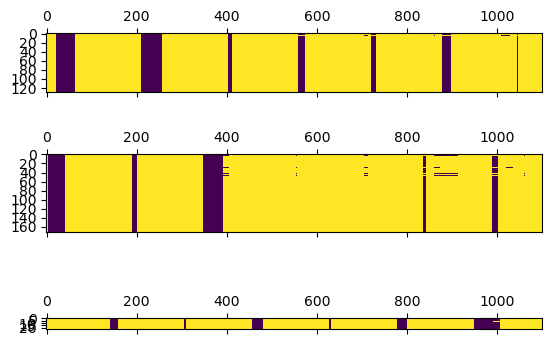

In [66]:
fig, axs = plt.subplots(nrows=3, ncols=1)
for idx, arrs in labeled_arrays.items():
    axs[idx].matshow(arrs)